In [2]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
data = {
    'Var1': np.random.normal(5, 1, 200) + np.random.normal(0, 0.5, 200),
    'Var2': np.random.normal(6, 1, 200) + np.random.normal(0, 0.5, 200),
    'Var3': np.random.normal(7, 1, 200) + np.random.normal(0, 0.5, 200),
    'Var4': np.random.normal(8, 1, 200) + np.random.normal(0, 0.5, 200),
    'Var5': np.random.normal(9, 1, 200) + np.random.normal(0, 0.5, 200),
    'Var6': np.random.normal(10, 1, 200) + np.random.normal(0, 0.5, 200),
}
df = pd.DataFrame(data)

In [4]:
kmo_all, kmo_model = calculate_kmo(df)
bartlett_chi2, bartlett_p = calculate_bartlett_sphericity(df)

In [5]:
print(f"KMO Test (overall): {kmo_model:.3f}")
print(f"Bartlett's Test: chi2 = {bartlett_chi2:.3f}, p-value = {bartlett_p:.3f}")

KMO Test (overall): 0.529
Bartlett's Test: chi2 = 12.325, p-value = 0.654


In [6]:
fa = FactorAnalyzer(method='principal', rotation=None)
fa.fit(df)

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

In [7]:
eigenvalues, _ = fa.get_eigenvalues()
print("\nEigenvalues:")
print(eigenvalues)


Eigenvalues:
[1.25599005 1.1109802  0.99646078 0.94000557 0.88106554 0.81549787]


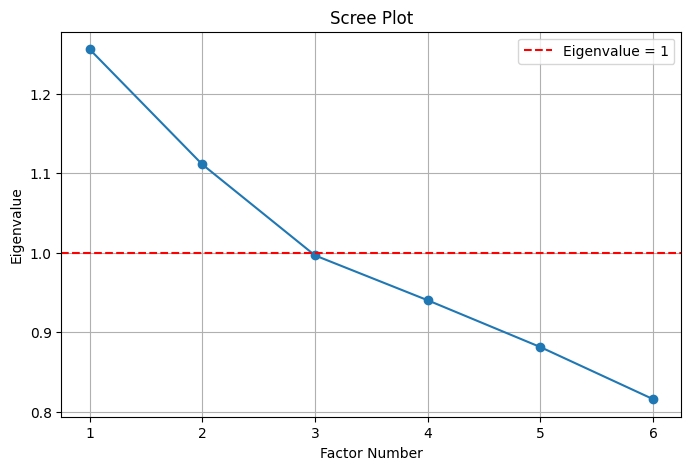

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
optimal_factors = 2 
fa = FactorAnalyzer(n_factors=optimal_factors, method='principal', rotation='varimax')
fa.fit(df)

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [10]:
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("\nFactor Loadings:")
print(loadings)


Factor Loadings:
       Factor1   Factor2
Var1 -0.463814  0.567489
Var2  0.643126  0.060312
Var3  0.488130 -0.223608
Var4  0.527463  0.418822
Var5 -0.077023 -0.764543
Var6 -0.283176  0.002452


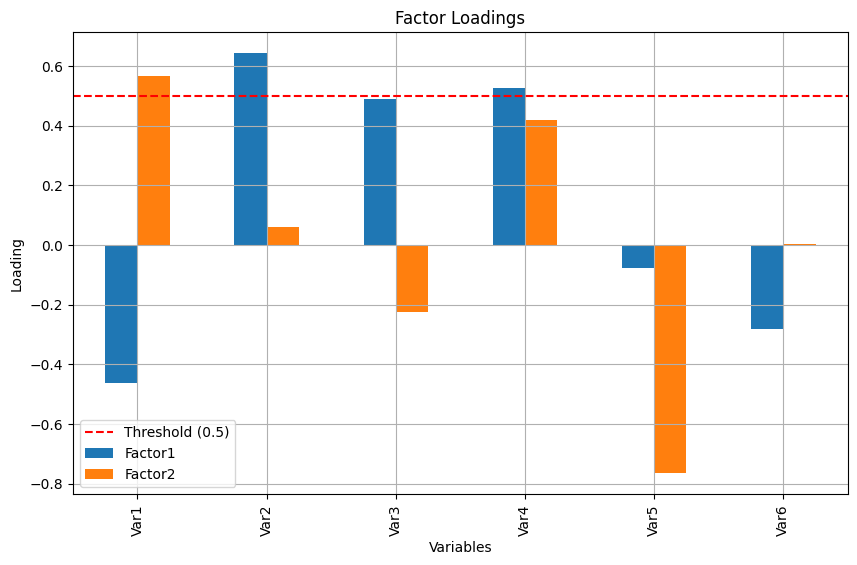

In [11]:
loadings.plot(kind='bar', figsize=(10, 6))
plt.title("Factor Loadings")
plt.xlabel("Variables")
plt.ylabel("Loading")
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
variance = pd.DataFrame({
    'Factor': [f'Factor{i+1}' for i in range(optimal_factors)],
    'Variance Explained (%)': fa.get_factor_variance()[1] * 100
})
print("\nVariance Explained by Factors:")
print(variance)


Variance Explained by Factors:
    Factor  Variance Explained (%)
0  Factor1               20.522403
1  Factor2               18.927101
